In [39]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('1-1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
print(thresh.shape)

# 噪声去除
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
# 确定背景区域
sure_bg = cv2.dilate(opening, kernel, iterations=3)  # 膨胀
# 寻找前景区域-对象分离
# separate分离系数，取值范围0.1-1
separate = 0.5

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, separate * dist_transform.max(), 255, 0)  # sure_fg为分离对象的图像
# 找到未知区域
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# 类别标记
ret, markers = cv2.connectedComponents(sure_fg)
# 为所有的标记加1，保证背景是0而不是1
markers = markers+1
# 现在让所有的未知区域为0
markers[unknown==255] = 0

markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]

dist_transform = cv2.normalize(dist_transform, 0, 1.0, cv2.NORM_MINMAX) * 80
cv2.imwrite("dist_transform.jpg", dist_transform)

cv2.imwrite("img.jpg", img)


(334, 500)


True

In [29]:
#encoding:utf-8

#
#灰度图像直方图
#

from matplotlib import pyplot as plt
import cv2

image = cv2.imread("1-1.jpg")
image[:,:,1] = 0


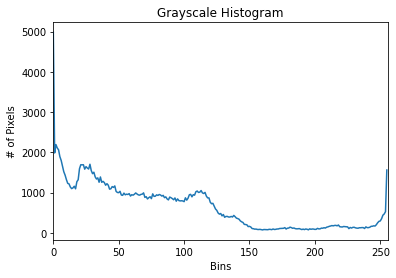

True

In [30]:
#图像直方图
hist = cv2.calcHist([image],[0],None,[256],[0,256])

plt.figure()#新建一个图像
plt.title("Grayscale Histogram")#图像的标题
plt.xlabel("Bins")#X轴标签
plt.ylabel("# of Pixels")#Y轴标签
plt.plot(hist)#画图
plt.xlim([0,256])#设置x坐标轴范围
plt.show()#显示图像

cv2.imwrite('img_blue.jpg',image)

(334, 500, 3)


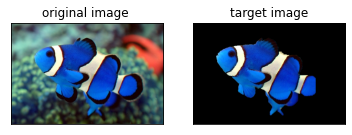

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread('1-1.jpg')
print(img.shape)
mask=np.zeros((img.shape[:2]),np.uint8)
bgdModel=np.zeros((1,65),np.float64)
fgdModel=np.zeros((1,65),np.float64)
rect=(11,11,390,411)
#这里计算了5次
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
#关于where函数第一个参数是条件，满足条件的话赋值为0，否则是1。如果只有第一个参数的话返回满足条件元素的坐标。
mask2=np.where((mask==2)|(mask==0),0,1).astype('uint8')
#mask2就是这样固定的
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('original image ')
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
#这里的img也是固定的。
img=img*mask2[:,:,np.newaxis]
plt.imshow(img)
plt.title('target image')
plt.xticks([])
plt.yticks([])
plt.show()

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
print(thresh.shape)

# 噪声去除
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
# 确定背景区域
sure_bg = cv2.dilate(opening, kernel, iterations=3)  # 膨胀
# 寻找前景区域-对象分离
# separate分离系数，取值范围0.1-1
separate = 0.15

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, separate * dist_transform.max(), 255, 0)  # sure_fg为分离对象的图像
# 找到未知区域
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# 类别标记
ret, markers = cv2.connectedComponents(sure_fg)
# 为所有的标记加1，保证背景是0而不是1
markers = markers+1
# 现在让所有的未知区域为0
markers[unknown==255] = 0

markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]

dist_transform = cv2.normalize(dist_transform, 0, 1.0, cv2.NORM_MINMAX) * 80
#cv2.imwrite("dist_transform.jpg", dist_transform)

cv2.imwrite("img3.jpg", img)

(960, 720)


True

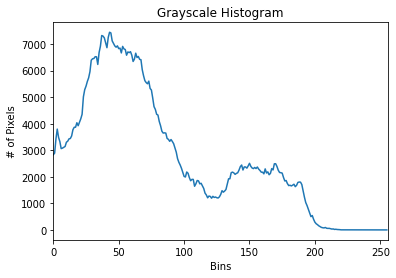

In [11]:
#图像直方图
hist = cv2.calcHist([gray],[0],None,[256],[0,256])

plt.figure()#新建一个图像
plt.title("Grayscale Histogram")#图像的标题
plt.xlabel("Bins")#X轴标签
plt.ylabel("# of Pixels")#Y轴标签
plt.plot(hist)#画图
plt.xlim([0,256])#设置x坐标轴范围
plt.show()#显示图像

#cv2.imwrite('img_blue.jpg',image)

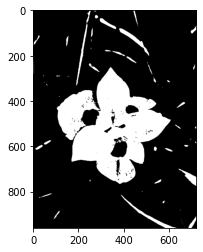

In [21]:
ret, th1 = cv2.threshold(gray, 125, 255, cv2.THRESH_BINARY)

# 使用Matplotlib显示
# 两行三列图
plt.imshow(th1, 'gray')
plt.show()